
<div class="alert alert-info" role="alert">
  <p>
    <b>Usage Guidelines</b>
  </p>

  <p>
    This lesson is part of the <b>DS Lab core curriculum</b>. For that reason, this notebook can only be used on your WQU virtual machine.
  </p>

  <p>
    This means:
    <ul>
      <li><span style="color: red">ⓧ</span> No downloading this notebook.</li>
      <li><span style="color: red">ⓧ</span> No re-sharing of this notebook with friends or colleagues.</li>
      <li><span style="color: red">ⓧ</span> No downloading the embedded videos in this notebook.</li>
      <li><span style="color: red">ⓧ</span> No re-sharing embedded videos with friends or colleagues.</li>
      <li><span style="color: red">ⓧ</span> No adding this notebook to public or private repositories.</li>
      <li><span style="color: red">ⓧ</span> No uploading this notebook (or screenshots of it) to other websites, including websites for study resources.</li>
    </ul>

  </p>
</div>


<font size="+3"><strong>2.5. Predicting Apartment Prices in Mexico City 🇲🇽</strong></font>

In [1]:
import warnings

import wqet_grader

warnings.simplefilter(action="ignore", category=FutureWarning)
wqet_grader.init("Project 2 Assessment")

<div class="alert alert-block alert-warning">
    <b>Note:</b> In this project there are graded tasks in both the lesson notebooks and in this assignment. Together they total 24 points. The minimum score you need to move to the next project is 22 points. Once you get 22 points, you will be enrolled automatically in the next project, and this assignment will be closed. This means that you might not be able to complete the last two tasks in this notebook. If you get an error message saying that you've already passed the course, that's good news. You can stop this assignment and move onto the project 3. 
</div>

In this assignment, you'll decide which libraries you need to complete the tasks. You can import them in the cell below. 👇

In [2]:
# Import libraries here
import pandas as pd
import numpy as np

# Prepare Data

## Import

**Task 2.5.1:** Write a `wrangle` function that takes the name of a CSV file as input and returns a DataFrame. The function should do the following steps:

1. Subset the data in the CSV file and return only apartments in Mexico City (`"Distrito Federal"`) that cost less than \$100,000.
2. Remove outliers by trimming the bottom and top 10\% of properties in terms of `"surface_covered_in_m2"`.
3. Create separate `"lat"` and `"lon"` columns.
4. Mexico City is divided into [15 boroughs](https://en.wikipedia.org/wiki/Boroughs_of_Mexico_City). Create a `"borough"` feature from the `"place_with_parent_names"` column.
5. Drop columns that are more than 50\% null values.
6. Drop columns containing low- or high-cardinality categorical values. 
7. Drop any columns that would constitute leakage for the target `"price_aprox_usd"`.
8. Drop any columns that would create issues of multicollinearity. 

<div class="alert alert-block alert-info">
<b>Tip:</b> Don't try to satisfy all the criteria in the first version of your <code>wrangle</code> function. Instead, work iteratively. Start with the first criteria, test it out with one of the Mexico CSV files in the <code>data/</code> directory, and submit it to the grader for feedback. Then add the next criteria.</div>

In [3]:
df = pd.read_csv("data/mexico-city-real-estate-1.csv")
# df['place_with_parent_names'].str.split("|", expand=True)[2]
df[df['place_with_parent_names'].str.split("|", expand=True)[2] == 'Distrito Federal']


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",5500000.0,MXN,5450245.50,289775.66,NaN,54.0,NaN,101851.851852,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/o3zb...
1,sell,house,|Iztapalapa|Distrito Federal|México|,"19.31033,-99.068557",1512000.0,MXN,1498321.97,79661.96,NaN,80.0,NaN,18900.000000,NaN,NaN,NaN,http://iztapalapa.properati.com.mx/q7t0_venta_...
2,sell,apartment,|Tlalpan|Distrito Federal|México|,"19.279771,-99.234597",926667.0,MXN,918284.00,48822.82,NaN,100.0,NaN,9266.670000,NaN,NaN,NaN,http://tlalpan.properati.com.mx/qbi4_venta_dep...
3,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"23.634501,-102.552788",6410000.0,MXN,6352013.39,337720.36,NaN,135.0,NaN,47481.481481,NaN,NaN,NaN,http://miguel-hidalgo-df.properati.com.mx/opeq...
5,sell,apartment,|Miguel Hidalgo|Distrito Federal|México|,"19.432657,-99.177444",4416000.0,MXN,4376051.62,232663.51,NaN,87.0,NaN,50758.620690,NaN,NaN,NaN,http://anzures.properati.com.mx/opct_venta_dep...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4621,sell,apartment,|Gustavo A. Madero|Distrito Federal|México|,NaN,2300000.0,MXN,2279733.89,121207.64,0.0,88.0,NaN,26136.363636,NaN,NaN,NaN,http://gustavo-a-madero.properati.com.mx/pluf_...
4622,sell,apartment,|Venustiano Carranza|Distrito Federal|México|,"19.4495981,-99.1246689",1140917.0,MXN,1141529.80,60692.23,58.0,NaN,1046.417759,NaN,NaN,NaN,NaN,http://venustiano-carranza.properati.com.mx/r7...
4624,sell,apartment,|Tlalpan|Distrito Federal|México|,"19.303758,-99.223733",10000000.0,MXN,10144274.75,539345.23,200.0,NaN,2696.726150,NaN,NaN,NaN,NaN,http://lomas-del-pedregal.properati.com.mx/pym...
4626,sell,apartment,|Cuauhtémoc|Distrito Federal|México|,"23.634501,-102.552788",2453800.0,MXN,2431602.18,129282.09,NaN,67.0,NaN,36623.880597,NaN,NaN,NaN,http://cuauhtemoc.properati.com.mx/p2op_venta_...


In [4]:
# Build your `wrangle` function
def wrangle(file_name):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_name)
    
    # Step 1: Subset data for apartments in Mexico City with price < $100,000
    df = df[(df['place_with_parent_names'].str.split("|", expand=True)[2] == 'Distrito Federal') & (df['price_aprox_usd'] < 100000) &\
           (df['property_type'] == 'apartment')]
    
    # Step 2: Remove outliers based on "surface_covered_in_m2"
    lower_bound = df['surface_covered_in_m2'].quantile(0.1)
    upper_bound = df['surface_covered_in_m2'].quantile(0.9)
    df = df[(df['surface_covered_in_m2'] >= lower_bound) & (df['surface_covered_in_m2'] <= upper_bound)]
    
    # Step 3: Create "lat" and "lon" columns
    df[['lat', 'lon']] = df['lat-lon'].str.split(",", expand=True).astype(float)
    
    # Step 4: Create "borough" feature from "place_with_parent_names"
    df['borough'] = df['place_with_parent_names'].str.split("|", expand=True)[1]
    
    # Step 5: Drop columns with more than 50% null values
    null_threshold = len(df) * 0.5
    df = df.dropna(thresh=null_threshold, axis=1)
    
    # Step 6: Drop columns with low/high-cardinality categorical values
    cardinality_threshold = 10
    categorical_columns = df.select_dtypes(include=['object']).columns
    low_cardinality_cols = [col for col in categorical_columns if df[col].nunique() <= cardinality_threshold]
    df = df.drop(columns=low_cardinality_cols)
    
    # Step 7: Drop columns that could cause leakage or multicollinearity
    columns_to_drop = ['price', 'price_aprox_local_currency', 'price_per_m2', 'lat-lon', 'place_with_parent_names', 'properati_url']
    df = df.drop(columns=columns_to_drop)
    
    return df


In [5]:
# Use this cell to test your wrangle function and explore the data

df_result = wrangle("data/mexico-city-real-estate-1.csv")
df_result.head()

,price_aprox_usd,surface_covered_in_m2,lat,lon,borough
11,94022.66,57.0,23.634501,-102.552788,Benito Juárez
20,70880.12,56.0,19.402413,-99.095391,Iztacalco
21,68228.99,80.0,19.357820,-99.149406,Benito Juárez
22,24235.78,60.0,19.504985,-99.208557,Azcapotzalco
26,94140.20,50.0,19.354219,-99.126244,Coyoacán


**Task 2.5.2:** Use glob to create the list `files`. It should contain the filenames of all the Mexico City real estate CSVs in the `./data` directory, except for `mexico-city-test-features.csv`.

In [7]:
import os

files = []
for filename in os.listdir('data'):
    if (filename != 'mexico-city-test-features.csv') & ('mexico' in filename):
        files.append('data/' + filename)
files

['data/mexico-city-real-estate-2.csv',
 'data/mexico-city-real-estate-5.csv',
 'data/mexico-city-real-estate-1.csv',
 'data/mexico-city-real-estate-4.csv',
 'data/mexico-city-real-estate-3.csv']

**Task 2.5.3:** Combine your `wrangle` function, a list comprehension, and `pd.concat` to create a DataFrame `df`. It should contain all the properties from the five CSVs in `files`. 

In [9]:
df = pd.concat([wrangle(file) for file in files])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5473 entries, 0 to 4622
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_aprox_usd        5473 non-null   float64
 1   surface_covered_in_m2  5473 non-null   float64
 2   lat                    5149 non-null   float64
 3   lon                    5149 non-null   float64
 4   borough                5473 non-null   object 
dtypes: float64(4), object(1)
memory usage: 256.5+ KB
None


,price_aprox_usd,surface_covered_in_m2,lat,lon,borough
0,63223.78,88.0,19.516777,-99.160149,Gustavo A. Madero
1,25289.51,48.0,19.466724,-99.131614,Gustavo A. Madero
17,89250.90,90.0,19.383327,-99.152712,Benito Juárez
19,39887.51,60.0,19.388280,-99.195529,Álvaro Obregón
20,42475.37,80.0,19.454582,-99.145651,Cuauhtémoc


## Explore

**Task 2.5.4:** Create a histogram showing the distribution of apartment prices (`"price_aprox_usd"`) in `df`. Be sure to label the x-axis `"Price [$]"`, the y-axis `"Count"`, and give it the title `"Distribution of Apartment Prices"`. Use Matplotlib (`plt`).

What does the distribution of price look like? Is the data normal, a little skewed, or very skewed?

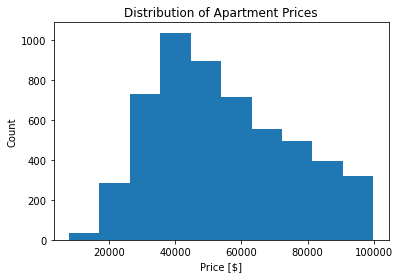

In [11]:
import matplotlib.pyplot as plt

# Build histogram
plt.hist(df["price_aprox_usd"])

# Label axes
plt.xlabel("Price [$]")
plt.ylabel("Count")

# Add title
plt.title("Distribution of Apartment Prices")

# Don't delete the code below 👇
plt.savefig("images/2-5-4.png", dpi=150)


**Task 2.5.5:** Create a scatter plot that shows apartment price (`"price_aprox_usd"`) as a function of apartment size (`"surface_covered_in_m2"`). Be sure to label your x-axis `"Area [sq meters]"` and y-axis `"Price [USD]"`. Your plot should have the title `"Mexico City: Price vs. Area"`. Use Matplotlib (`plt`).

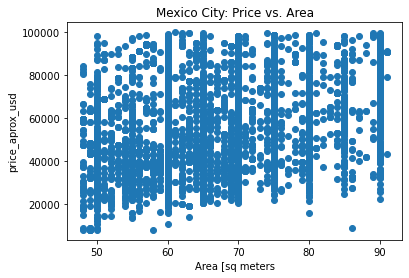

In [15]:
# Build scatter plot
plt.scatter(df["surface_covered_in_m2"], df["price_aprox_usd"])

# Label axes
plt.xlabel("Area [sq meters")
plt.ylabel("price_aprox_usd")

# Add title
plt.title("Mexico City: Price vs. Area")

# Don't delete the code below 👇
plt.savefig("images/2-5-5.png", dpi=150)


Do you see a relationship between price and area in the data? How is this similar to or different from the Buenos Aires dataset?<span style='color: transparent; font-size:1%'>WQU WorldQuant University Applied Data Science Lab QQQQ</span>

**Task 2.5.6:** **(UNGRADED)** Create a Mapbox scatter plot that shows the location of the apartments in your dataset and represent their price using color. 

What areas of the city seem to have higher real estate prices?

In [ ]:
# Plot Mapbox location and price
fig = ...


fig.show()

## Split

**Task 2.5.7:** Create your feature matrix `X_train` and target vector `y_train`. Your target is `"price_aprox_usd"`. Your features should be all the columns that remain in the DataFrame you cleaned above.

In [19]:
# Split data into feature matrix `X_train` and target vector `y_train`.

X_train = df[["surface_covered_in_m2", "lat", "lon", "borough"]]
y_train = df["price_aprox_usd"]

# Build Model

## Baseline

**Task 2.5.8:** Calculate the baseline mean absolute error for your model.

In [27]:
from sklearn.metrics import mean_absolute_error

y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
baseline_mae = mean_absolute_error(y_pred_baseline, y_train)
print("Mean apt price:", y_mean)
print("Baseline MAE:", baseline_mae)

Mean apt price: 54246.5314982642
Baseline MAE: 17239.939475888295


## Iterate

**Task 2.5.9:** Create a pipeline named `model` that contains all the transformers necessary for this dataset and one of the predictors you've used during this project. Then fit your model to the training data.

In [30]:
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Build Model
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    Ridge()
)
# Fit model
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['borough'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

## Evaluate

**Task 2.5.10:** Read the CSV file `mexico-city-test-features.csv` into the DataFrame `X_test`.

<div class="alert alert-block alert-info">
<b>Tip:</b> Make sure the <code>X_train</code> you used to train your model has the same column order as <code>X_test</code>. Otherwise, it may hurt your model's performance.
</div>

In [33]:
df_test = pd.read_csv("data/mexico-city-test-features.csv")
X_test = df_test[["surface_covered_in_m2", "lat", "lon", "borough"]]
print(X_test.info())
X_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surface_covered_in_m2  1041 non-null   float64
 1   lat                    986 non-null    float64
 2   lon                    986 non-null    float64
 3   borough                1041 non-null   object 
dtypes: float64(3), object(1)
memory usage: 32.7+ KB
None


,surface_covered_in_m2,lat,lon,borough
0,60.0,19.493185,-99.205755,Azcapotzalco
1,55.0,19.307247,-99.166700,Coyoacán
2,50.0,19.363469,-99.010141,Iztapalapa
3,60.0,19.474655,-99.189277,Azcapotzalco
4,74.0,19.394628,-99.143842,Benito Juárez


**Task 2.5.11:** Use your model to generate a Series of predictions for `X_test`. When you submit your predictions to the grader, it will calculate the mean absolute error for your model.

In [37]:
y_test_pred = pd.Series(model.predict(X_test))
y_test_pred.head()

0    53538.366480
1    53171.988369
2    34263.884179
3    53488.425607
4    68738.924884
dtype: float64

# Communicate Results

**Task 2.5.12:** Create a Series named `feat_imp`. The index should contain the names of all the features your model considers when making predictions; the values should be the coefficient values associated with each feature. The Series should be sorted ascending by absolute value.  

In [68]:
coefficients = model[2].coef_
features = pd.Series(coefficients, index=model[0].transform(X_train).columns)
feat_imp = features.abs().sort_values()
for idx in feat_imp.index:
    feat_imp[idx] = features[idx]
feat_imp

surface_covered_in_m2               291.654156
borough_Cuauhtémoc                 -350.531990
borough_Iztacalco                   405.403127
lat                                 478.901375
borough_Xochimilco                  929.857400
borough_Miguel Hidalgo             1977.314718
borough_Azcapotzalco               2459.288646
lon                               -2492.221814
borough_Álvaro Obregón             3275.121061
borough_Coyoacán                   3737.561001
borough_Venustiano Carranza       -5609.918629
borough_La Magdalena Contreras    -5925.666450
borough_Gustavo A. Madero         -6637.429757
borough_Cuajimalpa de Morelos      9157.269123
borough_Tlalpan                   10319.429804
borough_Iztapalapa               -13349.017448
borough_Benito Juárez             13778.188880
borough_Tláhuac                  -14166.869486
dtype: float64

In [74]:
feat_imp[8:].values

array([  3275.12106108,   3737.56100072,  -5609.91862933,  -5925.66645029,
        -6637.42975669,   9157.26912312,  10319.42980445, -13349.01744766,
        13778.18887983, -14166.86948588])

**Task 2.5.13:** Create a horizontal bar chart that shows the **10 most influential** coefficients for your model. Be sure to label your x- and y-axis `"Importance [USD]"` and `"Feature"`, respectively, and give your chart the title `"Feature Importances for Apartment Price"`. Use pandas. 

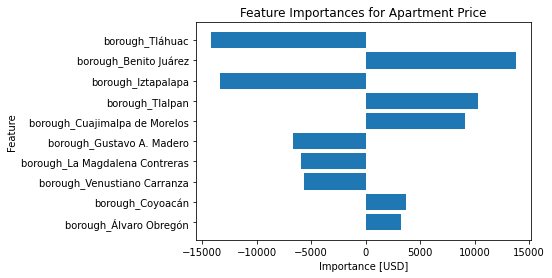

In [79]:
# Build bar chart
plt.barh(feat_imp[8:].index, feat_imp[8:].values)

# Label axes
plt.xlabel("Importance [USD]")
plt.ylabel("Feature")

# Add title
plt.title("Feature Importances for Apartment Price")


# Don't delete the code below 👇
plt.savefig("images/2-5-13.png", dpi=150)


---
Copyright 2022 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
